<a href="https://colab.research.google.com/github/Dhruv2211/CryptoCurrencyEDA/blob/main/CryptoCurrency_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [7]:
#Concatenating multiple CSVs of cryptocurrency to Analyse

df = pd.DataFrame();
for file in os.listdir("CryptoData"):
  if file.endswith(".csv"):
    df = pd.concat([df , pd.read_csv(os.path.join("CryptoData", file),infer_datetime_format=True)], axis=0 )

print(df)

            date     price  total_volume    market_cap  coin_name
0     2019-07-30  1.645194  3.980676e+06  0.000000e+00  ftx-token
1     2019-07-31  1.868647  4.232132e+06  0.000000e+00  ftx-token
2     2019-08-01  1.714517  2.827412e+06  0.000000e+00  ftx-token
3     2019-08-02  1.762781  2.452565e+06  0.000000e+00  ftx-token
4     2019-08-03  1.787141  2.674472e+06  0.000000e+00  ftx-token
...          ...       ...           ...           ...        ...
1086  2023-12-12  0.999885  2.954892e+07  6.491131e+08       frax
1087  2023-12-13  0.998254  1.222699e+07  6.489392e+08       frax
1088  2023-12-14  0.998333  1.203841e+07  6.488409e+08       frax
1089  2023-12-15  0.998215  9.163555e+06  6.483814e+08       frax
1090  2023-12-16  0.997036  5.882114e+06  6.479402e+08       frax

[93728 rows x 5 columns]


In [8]:
df.to_csv('final.csv')

In [12]:
#Final_df = pd.read_csv('final.csv')

df.head()

,date,price,total_volume,market_cap,coin_name
0,2019-07-30,1.645194,3.980676e+06,0.0,ftx-token
1,2019-07-31,1.868647,4.232132e+06,0.0,ftx-token
2,2019-08-01,1.714517,2.827412e+06,0.0,ftx-token
3,2019-08-02,1.762781,2.452565e+06,0.0,ftx-token
4,2019-08-03,1.787141,2.674472e+06,0.0,ftx-token


In [13]:
df.tail()

,date,price,total_volume,market_cap,coin_name
1086,2023-12-12,0.999885,2.954892e+07,6.491131e+08,frax
1087,2023-12-13,0.998254,1.222699e+07,6.489392e+08,frax
1088,2023-12-14,0.998333,1.203841e+07,6.488409e+08,frax
1089,2023-12-15,0.998215,9.163555e+06,6.483814e+08,frax
1090,2023-12-16,0.997036,5.882114e+06,6.479402e+08,frax


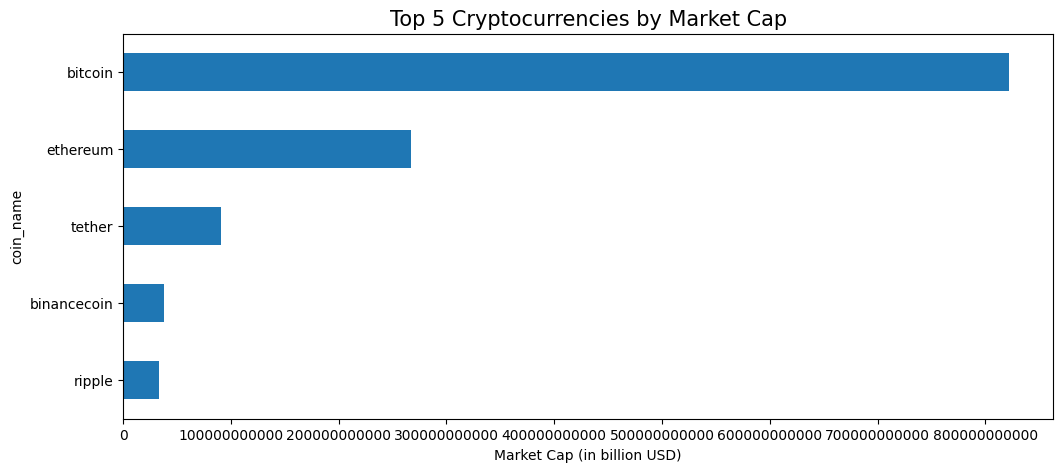

In [16]:
plt.figure(figsize=(12,5))
ax = df.groupby(['coin_name'])['market_cap'].last().sort_values(ascending = False).head(5).sort_values().plot(kind = 'barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format(style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()



Bitcoin is by far the top cryptocurrency as of December 2023 based on Market Cap. Followed by Ethereum, Tether, Binance Coin and Ripple.

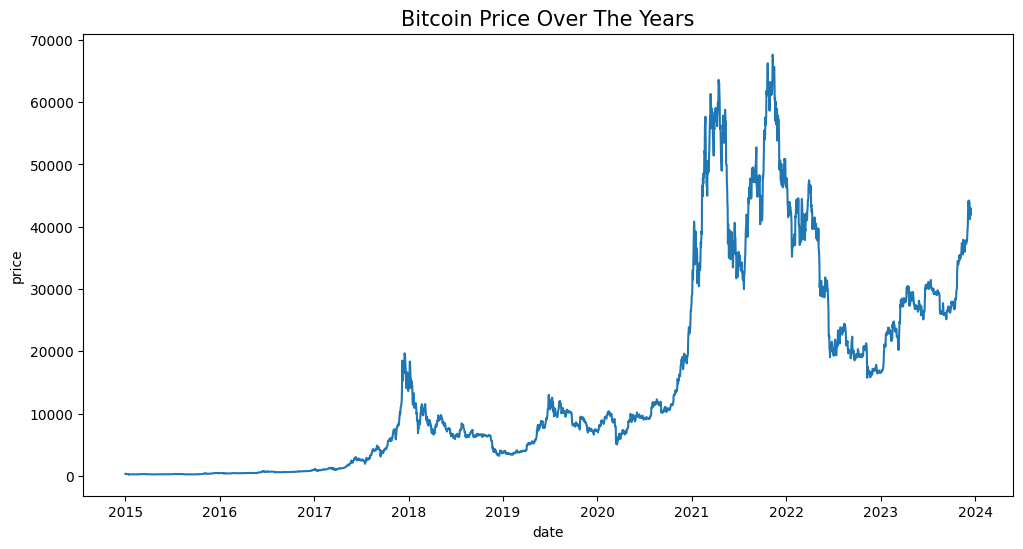

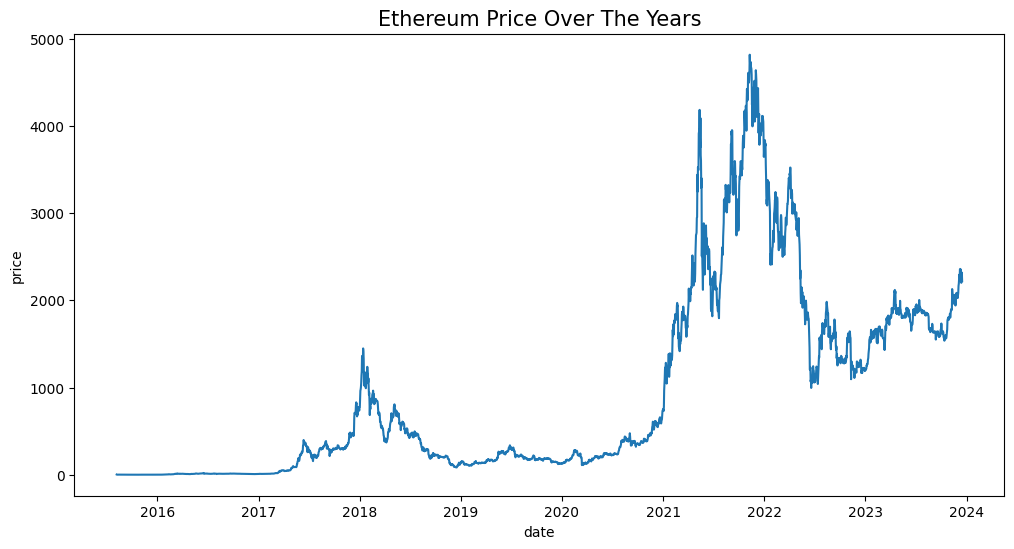

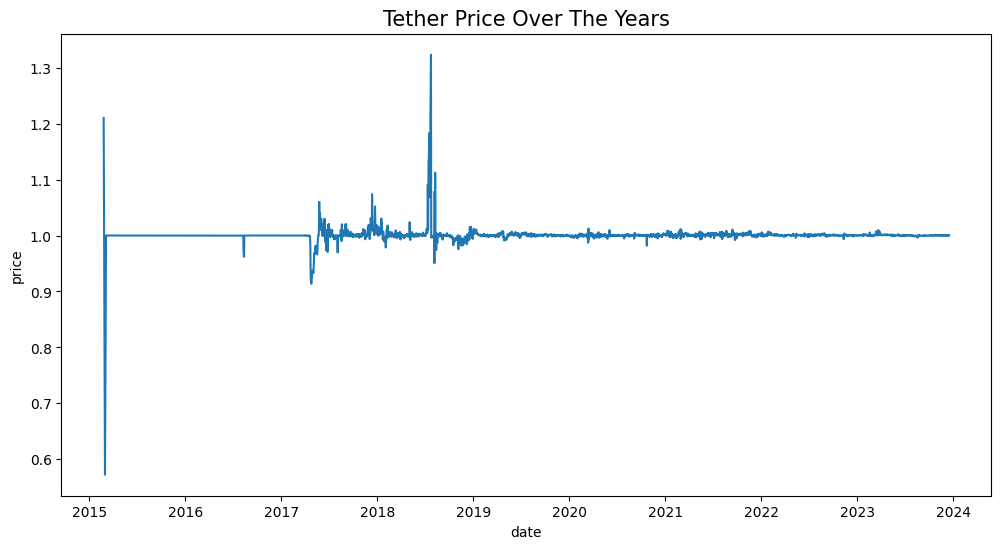

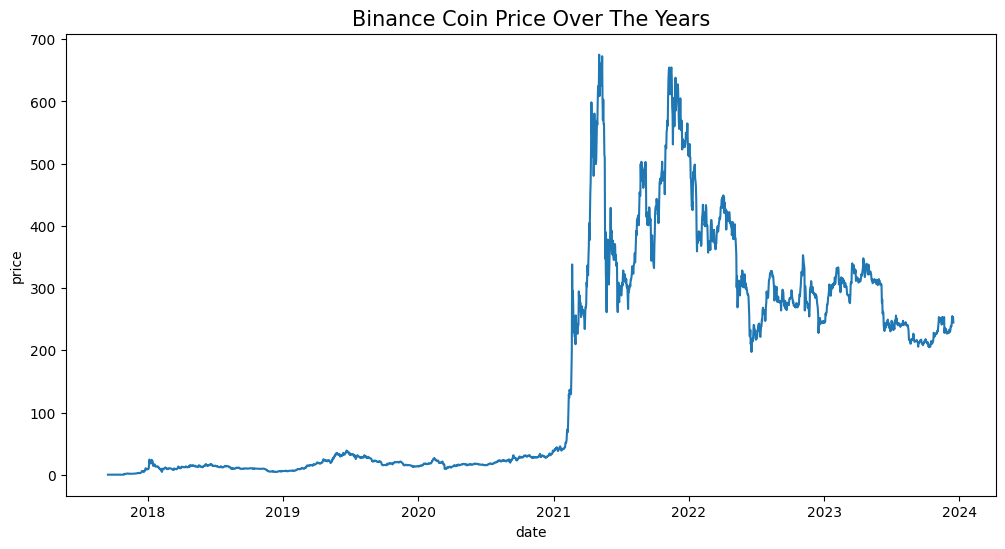

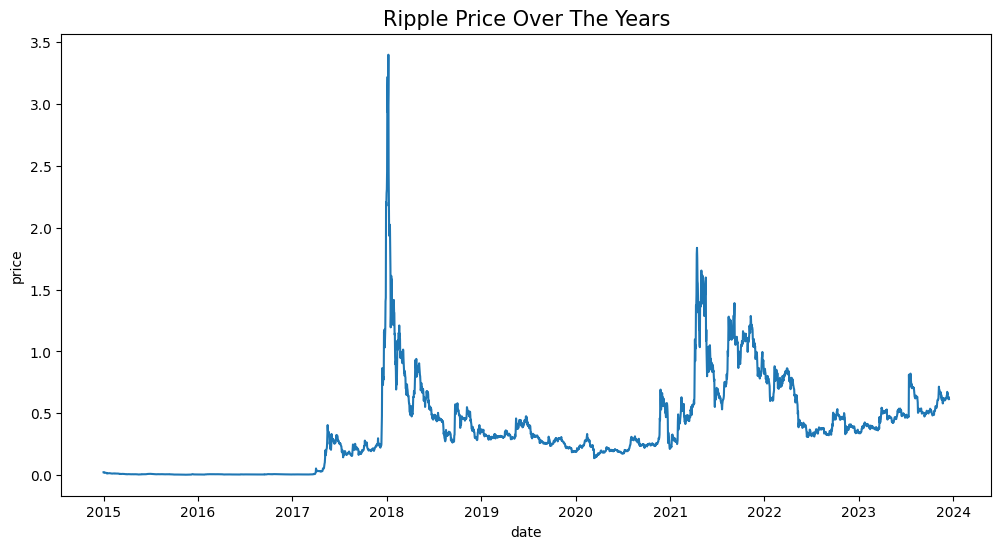

In [48]:
#dx = df.copy()
df['date']=pd.to_datetime(df['date']).dt.date

#Bitcoin Price over the years
plt.figure(figsize=(12,6))
bitcoin_close_price = df.loc[df['coin_name'] == 'bitcoin']
sns.lineplot(data = bitcoin_close_price, x = "date", y = "price")
plt.title("Bitcoin Price Over The Years", fontsize=15)
#plt.show()

#Ethereum price over the years
plt.figure(figsize=(12,6))
ethereum_close_price = df.loc[df['coin_name'] == 'ethereum']
sns.lineplot(data = ethereum_close_price, x = "date", y = "price")
plt.title("Ethereum Price Over The Years", fontsize=15)
#plt.show()


#Tether price over the years
plt.figure(figsize=(12,6))
tether_close_price = df.loc[df['coin_name'] == 'tether']
sns.lineplot(data = tether_close_price, x = "date", y = "price")
plt.title("Tether Price Over The Years", fontsize=15)
#plt.show()

#BinanceCoin price over the years
plt.figure(figsize=(12,6))
binancecoin_close_price = df.loc[df['coin_name'] == 'binancecoin']
sns.lineplot(data = binancecoin_close_price, x = "date", y = "price")
plt.title("Binance Coin Price Over The Years", fontsize=15)
#plt.show()

#Ripple price over the years
plt.figure(figsize=(12,6))
ripple_close_price = df.loc[df['coin_name'] == 'ripple']
sns.lineplot(data = ripple_close_price, x = "date", y = "price")
plt.title("Ripple Price Over The Years", fontsize=15)
plt.show()

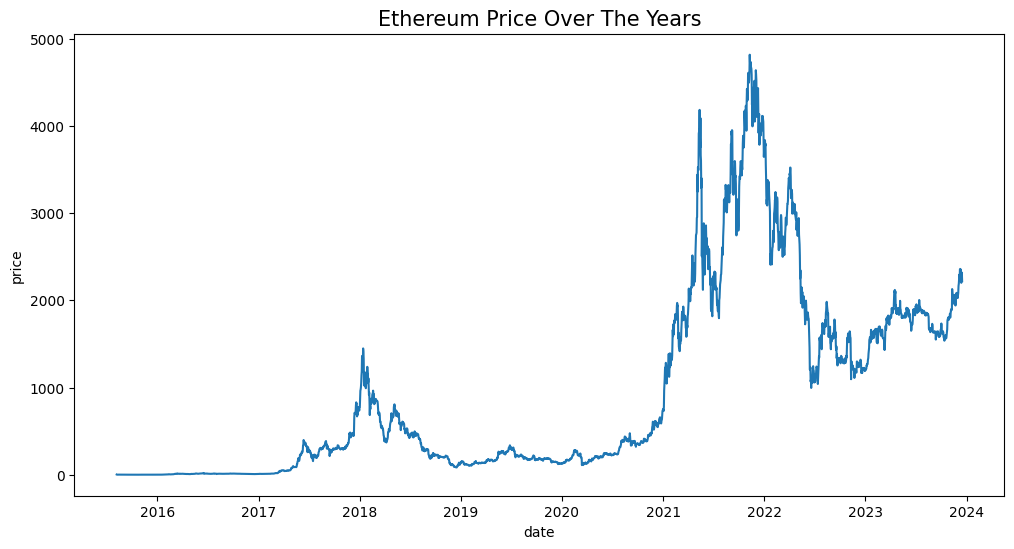

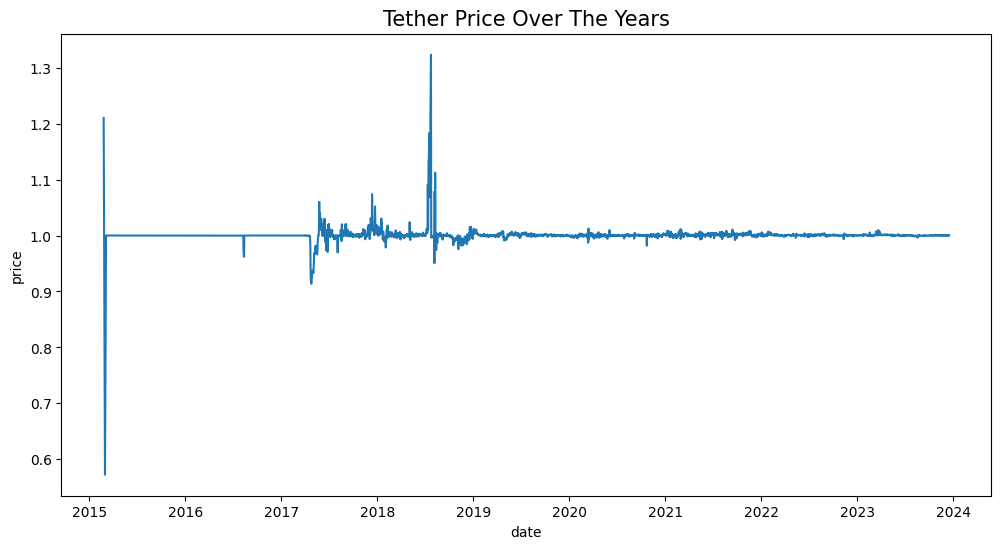

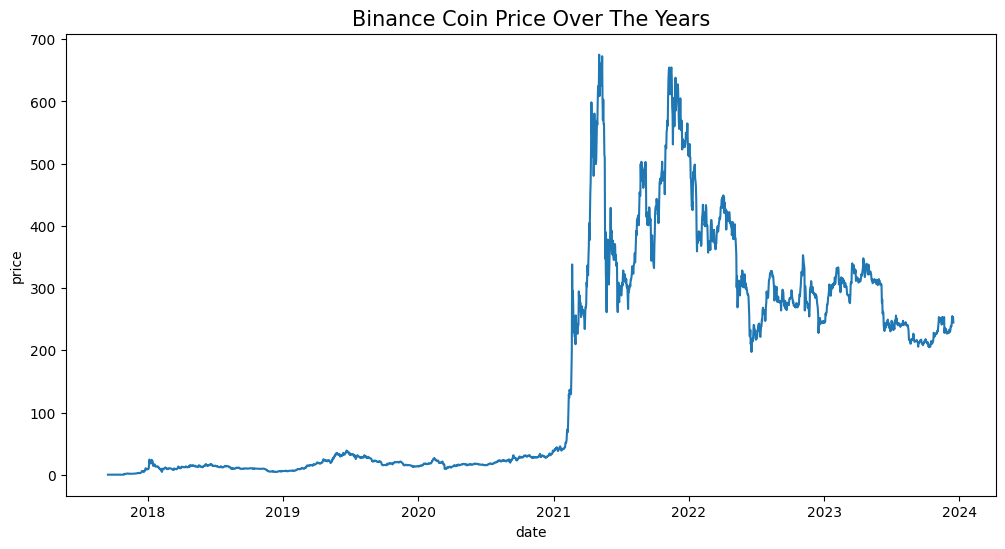

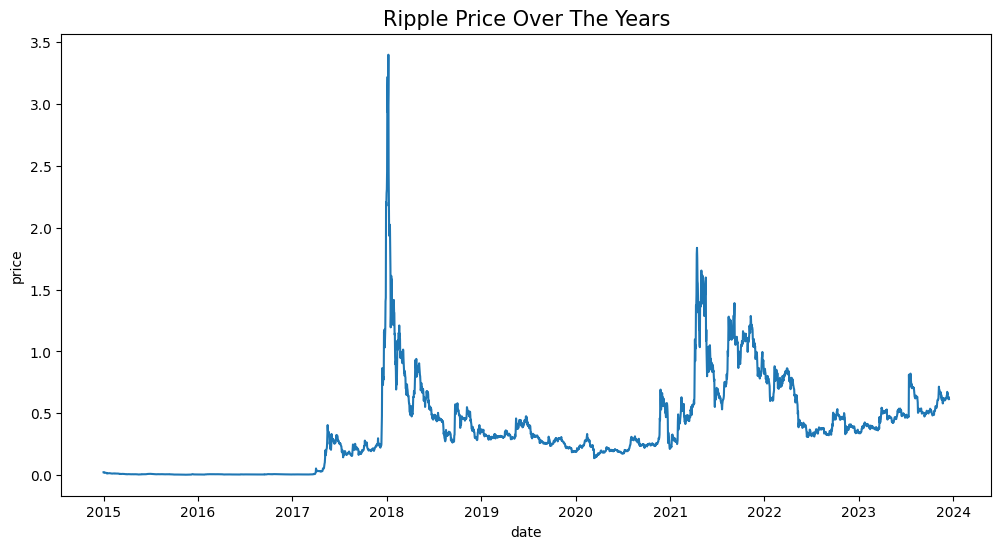

Based on the above charts, you can find the prices of the top 5 Cryptocurrencies, with Bitcoin being the most expensive.

# **Now lets try to find the current trend of the top 5 cryptocurrencies, i.e if they are in a bullish or a bearish trend. **

What is 100 MA and 200 MA?
100 MA is basically of 100 days moving average of the price and 200 MA is 200 days moving average. Both are calculated by taking a mean of 100 or 200 days in a particular set of duration.

If the 100 MA crosses 200 MA, it is said to be a bullish trend, and if it is the vice versa of it, i.e 200 MA crosses 100 MA, it is said to be a bearish trend.

Text(0.5, 1.0, 'Bitcoin 100MA vs 200MA')

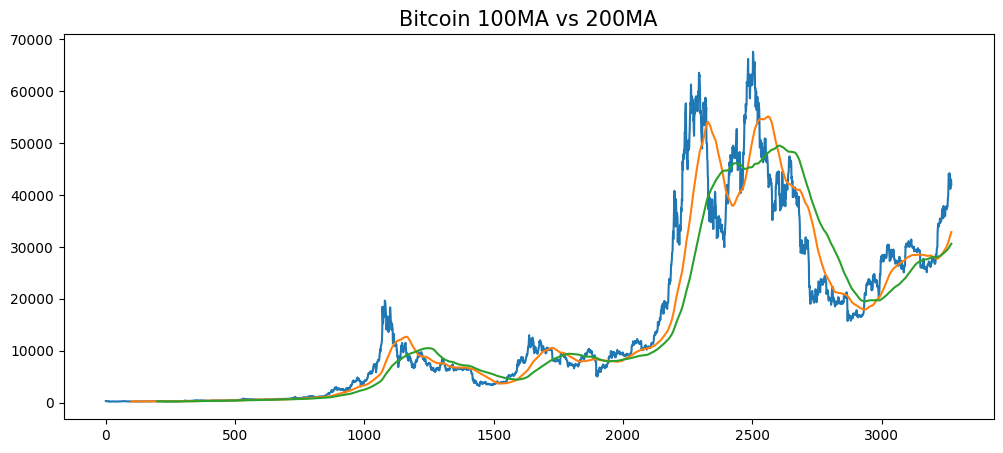

In [50]:

plt.figure(figsize = (12,5))
bitcoin100ma = bitcoin_close_price['price'].rolling(window = 100).mean()
bitcoin200ma = bitcoin_close_price['price'].rolling(window = 200).mean()
#sns.lineplot(data = bitcoin_close_price, x = "date", y = "price")
plt.plot(bitcoin_close_price['price'])
plt.plot(bitcoin100ma)
plt.plot(bitcoin200ma)
plt.title("Bitcoin 100MA vs 200MA", fontsize=15)
#plt.show()



Based on the above Graph, the 100MA (Moving Average) is crossing the 200 MA (Moving Average), which accoriding to technincal analysis shows a start of a bullish trend. Hence Bitcoin seems to be in a bullish trend.

Text(0.5, 1.0, 'Ethereum 100MA vs 200MA')

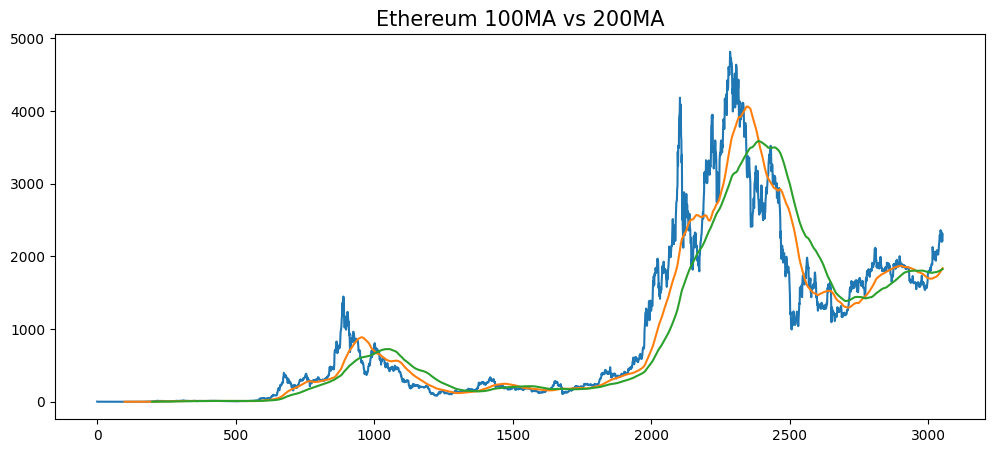

In [55]:
plt.figure(figsize = (12,5))
ethereum100ma = ethereum_close_price['price'].rolling(window = 100).mean()
ethereum200ma = ethereum_close_price['price'].rolling(window = 200).mean()
#sns.lineplot(data = bitcoin_close_price, x = "date", y = "price")
plt.plot(ethereum_close_price['price'])
plt.plot(ethereum100ma)
plt.plot(ethereum200ma)
plt.title("Ethereum 100MA vs 200MA", fontsize=15)

Based on the above Graph, the 100MA (Moving Average) is about to cross the 200 MA (Moving Average), which shows a possibility that Ethereum can turn enter the bullish trend in near future.

Text(0.5, 1.0, 'Tether 100MA vs 200MA')

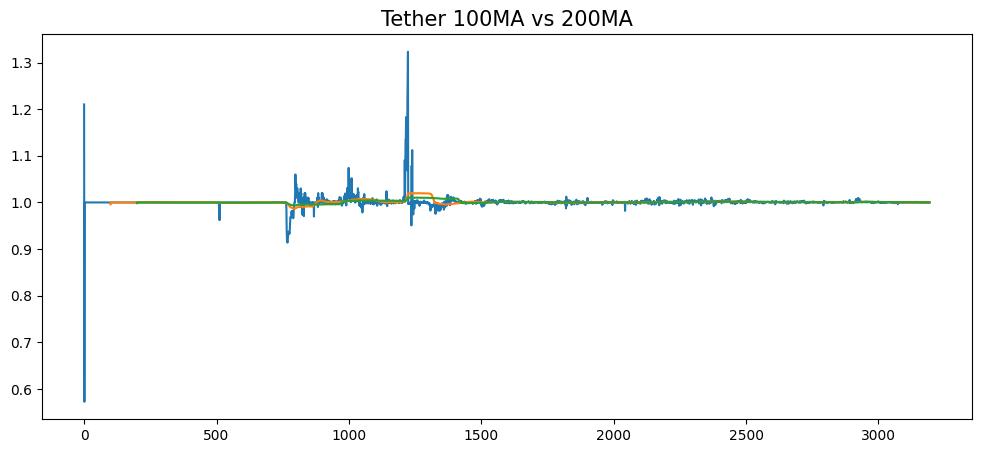

In [46]:
plt.figure(figsize = (12,5))
tether100ma = tether_close_price['price'].rolling(window = 100).mean()
tether200ma = tether_close_price['price'].rolling(window = 200).mean()
#sns.lineplot(data = bitcoin_close_price, x = "date", y = "price")
plt.plot(tether_close_price['price'])
plt.plot(tether100ma)
plt.plot(tether200ma)
plt.title("Tether 100MA vs 200MA", fontsize=15)

Based on the above graph, the price of Tether has been nearly same for a long period of time, hence making it a stable coin.

Text(0.5, 1.0, 'Binance Coin 100MA vs 200MA')

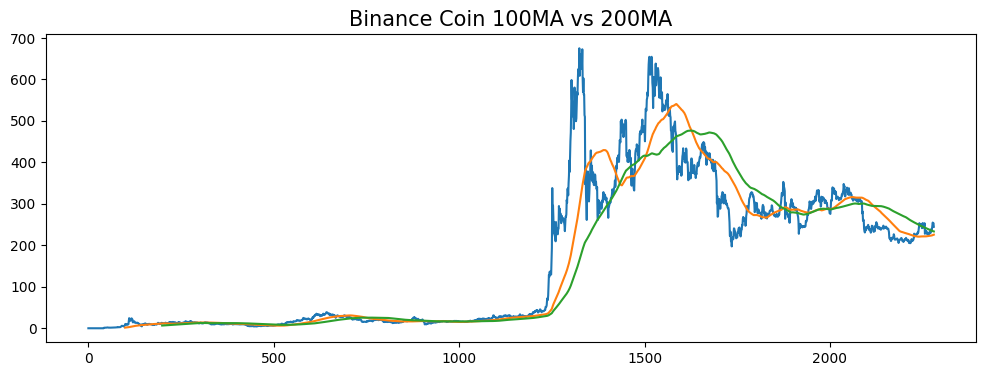

In [57]:
plt.figure(figsize = (12,4))
binancecoin100ma = binancecoin_close_price['price'].rolling(window = 100).mean()
binancecoin200ma = binancecoin_close_price['price'].rolling(window = 200).mean()
#sns.lineplot(data = bitcoin_close_price, x = "date", y = "price")
plt.plot(binancecoin_close_price['price'])
plt.plot(binancecoin100ma)
plt.plot(binancecoin200ma)
plt.title("Binance Coin 100MA vs 200MA", fontsize=15)

Based on the above graph, it seems like 100MA might cross 200MA, to turn into a bullish trend. However, one needs to keep an eye, as there have been falls breakout before as well.

Text(0.5, 1.0, 'Ripple 100MA vs 200MA')

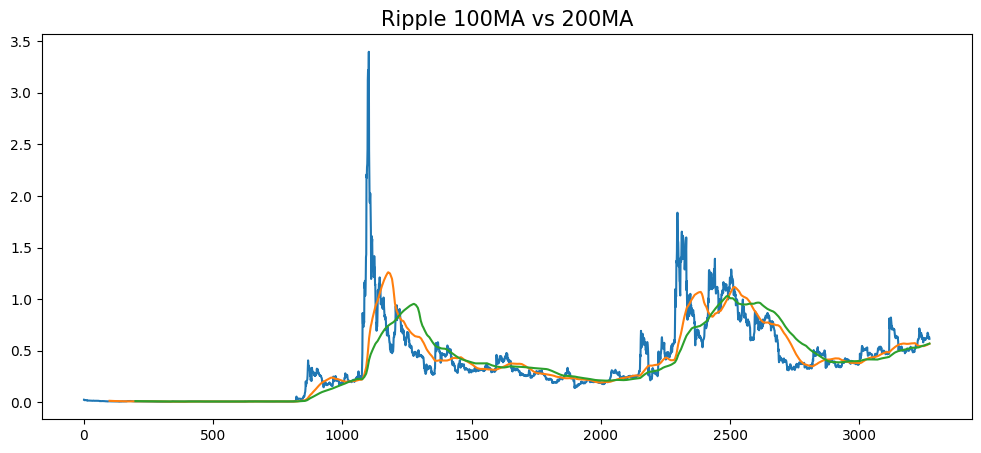

In [58]:
plt.figure(figsize = (12,5))
ripple100ma = ripple_close_price['price'].rolling(window = 100).mean()
ripple200ma = ripple_close_price['price'].rolling(window = 200).mean()
#sns.lineplot(data = bitcoin_close_price, x = "date", y = "price")
plt.plot(ripple_close_price['price'])
plt.plot(ripple100ma)
plt.plot(ripple200ma)
plt.title("Ripple 100MA vs 200MA", fontsize=15)

Based on the above graph, it shows that the 200 MA is crossing the 100 MA which clearly means that it is a bearish trend.